## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data impot

In [2]:
# Load the DataFrames from CSV files
df_flight_flightdelay = pd.read_csv('df_flight_imp.csv')  # Load flight data from CSV
df_ground_flightdelay = pd.read_csv('df_ground_imp.csv')  # Load ground data from CSV
df_personal_flightdelay = pd.read_csv('df_personal_imp.csv')  # Load personal data from CSV

C:\Users\marti\AppData\Local\Temp\ipykernel_28844\2142828222.py:4: DtypeWarning: Columns (66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  df_personal_flightdelay = pd.read_csv('df_personal_imp.csv')  # Load personal data from CSV


## 3.1 Correlation analysis

### flight_time_delay

In [3]:
print(df_flight_flightdelay.dtypes)

leg_no                     int64
fn_number                 object
dep_ap_sched              object
arr_ap_sched              object
dep_sched                 object
arr_sched                 object
m_offblockdt              object
m_onblockdt               object
departure_delay          float64
arrival_delay            float64
sched_flight_time        float64
act_flight_time          float64
ac_registration           object
change_reason_code        object
ac_type_code              object
trans_time                 int64
sched_trans_time           int64
trans_time_delay           int64
crew_group                object
crew_type_change          object
sched_ground_time        float64
ground_time_delay        float64
act_ground_time          float64
catering_duration        float64
pax_boarding_duration    float64
flight_time_delay        float64
dep_inbound_weekday       object
arr_weekday               object
dep_time_of_day           object
arr_time_of_day           object
anzahl_per

#### Correlation of numerical features

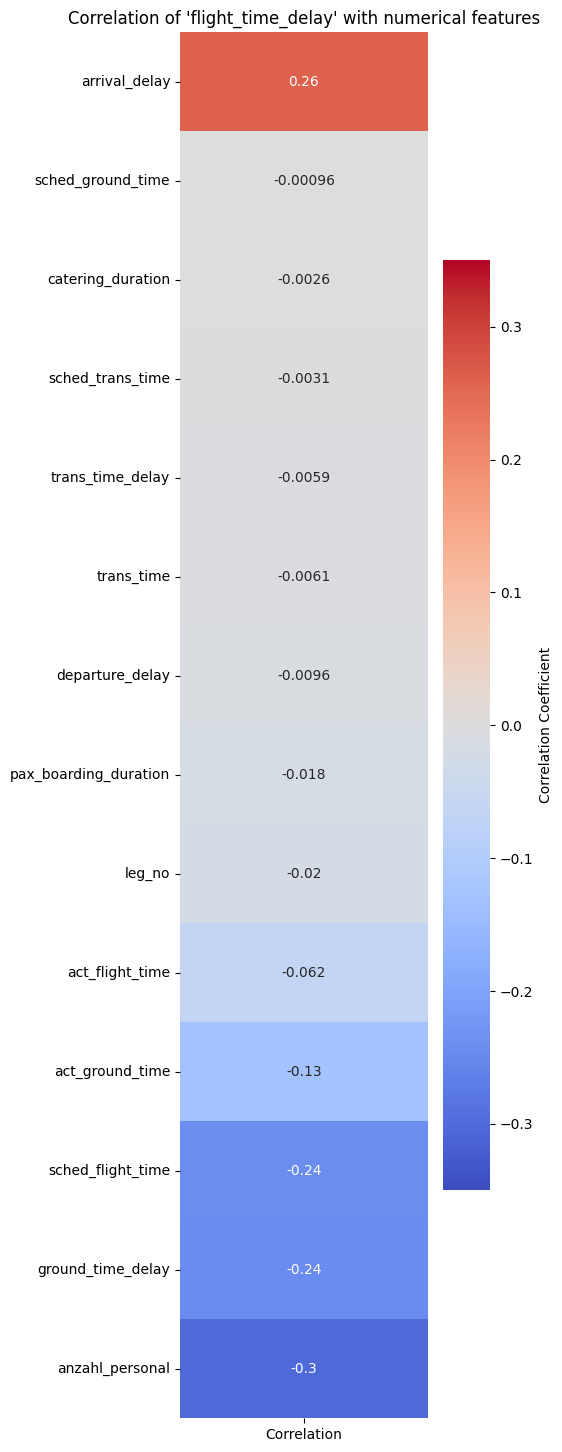

arrival_delay            0.260774
sched_ground_time       -0.000958
catering_duration       -0.002571
sched_trans_time        -0.003063
trans_time_delay        -0.005874
trans_time              -0.006123
departure_delay         -0.009573
pax_boarding_duration   -0.018149
leg_no                  -0.020123
act_flight_time         -0.061744
act_ground_time         -0.129708
sched_flight_time       -0.242408
ground_time_delay       -0.244694
anzahl_personal         -0.301385
Name: flight_time_delay, dtype: float64


In [4]:
# Select only the numerical columns from the DataFrame
numeric_df_flight_flightdelay = df_flight_flightdelay.select_dtypes(include=[float, int])  # Select columns of type float and int

# Calculate the correlation matrix for numerical columns
correlation_matrix = numeric_df_flight_flightdelay.corr()  # Compute pairwise correlation of columns

# Extract correlations with the 'flight_time_delay' column, dropping self-correlation
flight_time_delay_corr = correlation_matrix['flight_time_delay'].drop('flight_time_delay').sort_values(ascending=False)

# Convert the series to a DataFrame for visualization
flight_time_delay_corr_df = flight_time_delay_corr.to_frame(name='Correlation')

# Plot the heatmap of the correlations
plt.figure(figsize=(4, 18))  # Set figure size
sns.heatmap(flight_time_delay_corr_df, annot=True, cmap="coolwarm", center=0, vmin=-0.35, vmax=0.35, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation of 'flight_time_delay' with numerical features")  # Add title
plt.show()  # Show heatmap

# Display the correlations as a DataFrame
print(flight_time_delay_corr)

#### Correlation of time categories

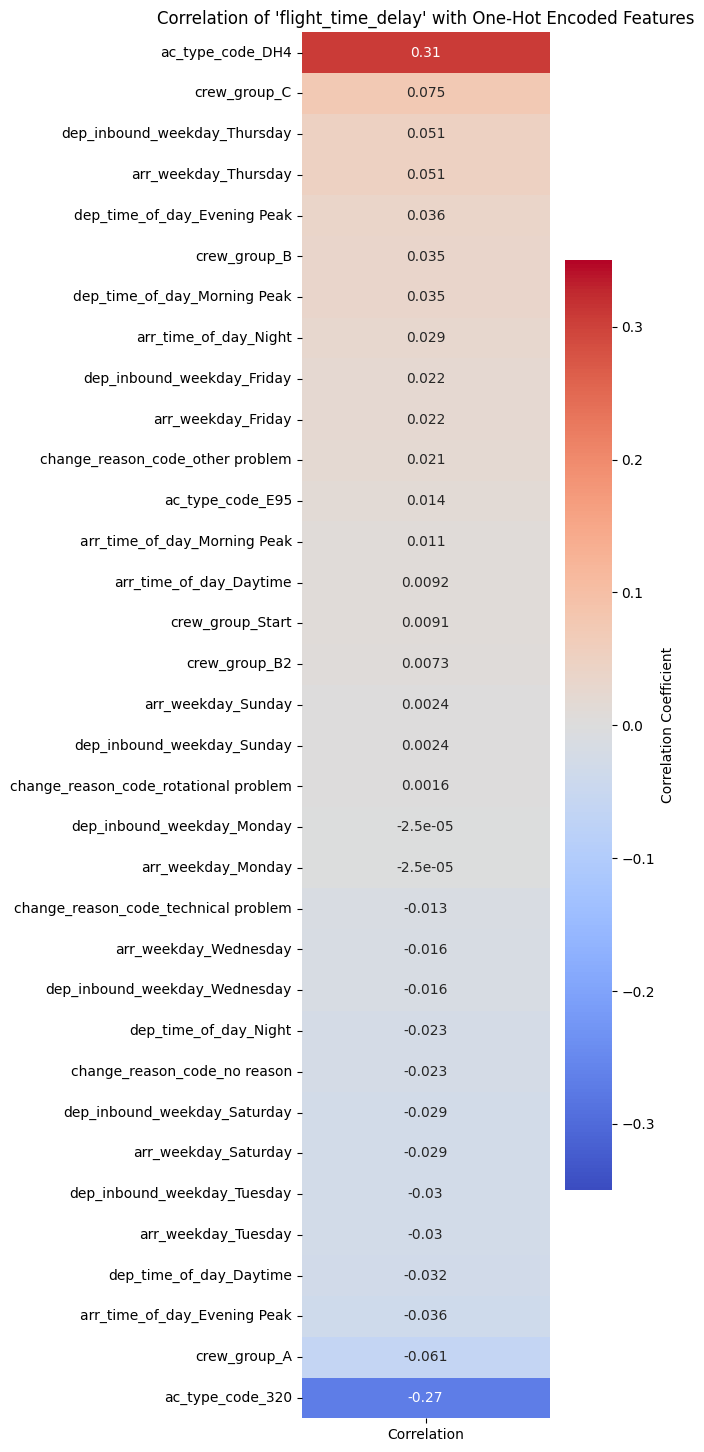

ac_type_code_DH4                         0.308424
crew_group_C                             0.074891
dep_inbound_weekday_Thursday             0.050526
arr_weekday_Thursday                     0.050526
dep_time_of_day_Evening Peak             0.035576
crew_group_B                             0.034890
dep_time_of_day_Morning Peak             0.034597
arr_time_of_day_Night                    0.029138
dep_inbound_weekday_Friday               0.022397
arr_weekday_Friday                       0.022397
change_reason_code_other problem         0.021036
ac_type_code_E95                         0.013716
arr_time_of_day_Morning Peak             0.010663
arr_time_of_day_Daytime                  0.009213
crew_group_Start                         0.009113
crew_group_B2                            0.007261
arr_weekday_Sunday                       0.002430
dep_inbound_weekday_Sunday               0.002430
change_reason_code_rotational problem    0.001587
dep_inbound_weekday_Monday              -0.000025


In [5]:
# List of categorical columns to apply One-Hot Encoding
categorical_columns = [
    'dep_time_of_day', 'arr_time_of_day', 'arr_weekday', 'dep_inbound_weekday', 
    'ac_type_code', 'change_reason_code', 'crew_group',
    # 'ac_registration' is commented out, you can include it if needed
]

# Apply One-Hot Encoding for each categorical feature
df_encoded = pd.get_dummies(df_flight_flightdelay[categorical_columns], drop_first=False)

# Concatenate the encoded columns with the original 'flight_time_delay'
df_flight_flightdelay_encoded = pd.concat([df_flight_flightdelay['flight_time_delay'], df_encoded], axis=1)

# Calculate the correlation matrix for all numerical and one-hot encoded columns
correlation_matrix = df_flight_flightdelay_encoded.corr()

# Extract correlations with 'flight_time_delay' and drop the self-correlation
flight_time_delay_corr = correlation_matrix['flight_time_delay'].drop('flight_time_delay').sort_values(ascending=False)

# Convert the correlations into a DataFrame for visualization
flight_time_delay_corr_df = flight_time_delay_corr.to_frame(name='Correlation')

# Plot the heatmap for the correlations with 'flight_time_delay'
plt.figure(figsize=(4, 18))
sns.heatmap(flight_time_delay_corr_df, annot=True, cmap="coolwarm", center=0, vmin=-0.35, vmax=0.35, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation of 'flight_time_delay' with One-Hot Encoded Features")
plt.show()

# Display the correlations in the console
print(flight_time_delay_corr)

#### Correlation of airports

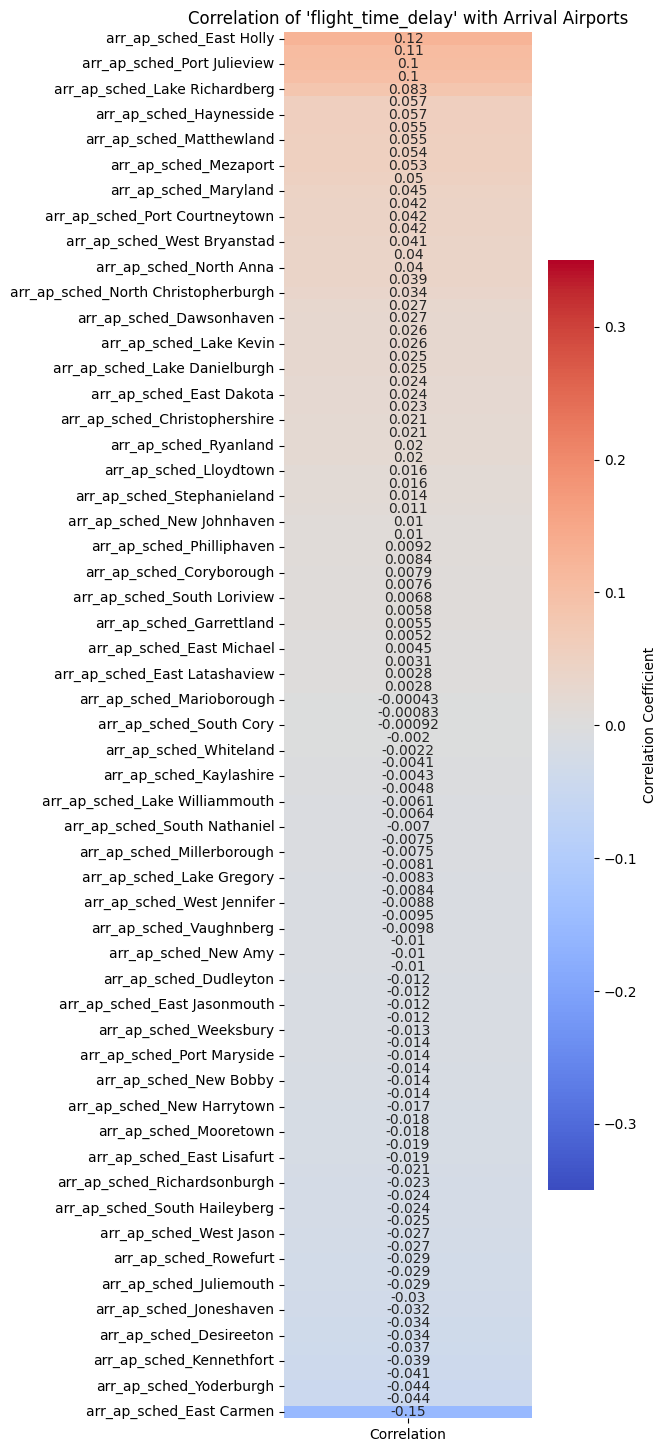

arr_ap_sched_East Holly          0.123929
arr_ap_sched_Youngland           0.108913
arr_ap_sched_Port Julieview      0.104195
arr_ap_sched_Paulbury            0.100039
arr_ap_sched_Lake Richardberg    0.083002
                                   ...   
arr_ap_sched_Kennethfort        -0.038909
arr_ap_sched_Russellchester     -0.040990
arr_ap_sched_Yoderburgh         -0.043782
arr_ap_sched_Kristashire        -0.044487
arr_ap_sched_East Carmen        -0.150802
Name: flight_time_delay, Length: 109, dtype: float64


In [6]:
# List of categorical columns to apply One-Hot Encoding
categorical_columns = [
    # 'dep_ap_sched',  # Optional: You can include this if needed
    'arr_ap_sched',  # Only 'arr_ap_sched' column for One-Hot Encoding
]

# Apply One-Hot Encoding for each categorical feature
df_encoded = pd.get_dummies(df_flight_flightdelay[categorical_columns], drop_first=False)

# Concatenate the encoded columns with the original 'flight_time_delay'
df_flight_flightdelay_encoded = pd.concat([df_flight_flightdelay['flight_time_delay'], df_encoded], axis=1)

# Calculate the correlation matrix for all numerical and one-hot encoded columns
correlation_matrix = df_flight_flightdelay_encoded.corr()

# Extract correlations with 'flight_time_delay' and drop the self-correlation
flight_time_delay_corr = correlation_matrix['flight_time_delay'].drop('flight_time_delay').sort_values(ascending=False)

# Convert the correlations into a DataFrame for visualization
flight_time_delay_corr_df = flight_time_delay_corr.to_frame(name='Correlation')

# Create a heatmap to visualize the correlations
plt.figure(figsize=(4, 18))
sns.heatmap(flight_time_delay_corr_df, annot=True, cmap="coolwarm", center=0, vmin=-0.35, vmax=0.35, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation of 'flight_time_delay' with Arrival Airports")
plt.show()  # Show the heatmap

# Display the correlations in the console
print(flight_time_delay_corr)

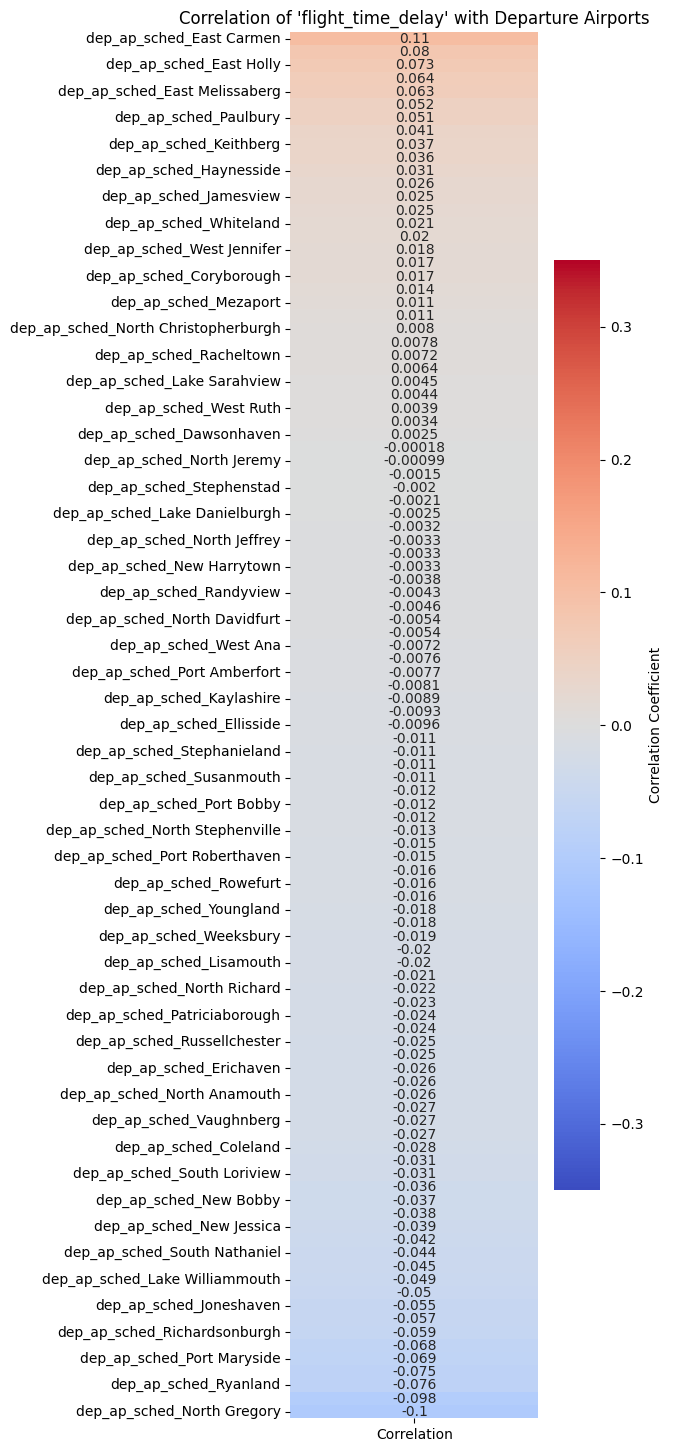

dep_ap_sched_East Carmen          0.106327
dep_ap_sched_Port Courtneytown    0.079953
dep_ap_sched_East Holly           0.073324
dep_ap_sched_East Allisontown     0.063547
dep_ap_sched_East Melissaberg     0.062655
                                    ...   
dep_ap_sched_Port Maryside       -0.068834
dep_ap_sched_Davidtown           -0.075458
dep_ap_sched_Ryanland            -0.075532
dep_ap_sched_East Latashaview    -0.098114
dep_ap_sched_North Gregory       -0.103981
Name: flight_time_delay, Length: 105, dtype: float64


In [7]:
# List of categorical columns to apply One-Hot Encoding
categorical_columns = [
    'dep_ap_sched',  # Optional: You can include this if needed
    # 'arr_ap_sched',  # Only 'arr_ap_sched' column for One-Hot Encoding
]

# Apply One-Hot Encoding for each categorical feature
df_encoded = pd.get_dummies(df_flight_flightdelay[categorical_columns], drop_first=False)

# Concatenate the encoded columns with the original 'flight_time_delay'
df_flight_flightdelay_encoded = pd.concat([df_flight_flightdelay['flight_time_delay'], df_encoded], axis=1)

# Calculate the correlation matrix for all numerical and one-hot encoded columns
correlation_matrix = df_flight_flightdelay_encoded.corr()

# Extract correlations with 'flight_time_delay' and drop the self-correlation
flight_time_delay_corr = correlation_matrix['flight_time_delay'].drop('flight_time_delay').sort_values(ascending=False)

# Convert the correlations into a DataFrame for visualization
flight_time_delay_corr_df = flight_time_delay_corr.to_frame(name='Correlation')

# Create a heatmap to visualize the correlations
plt.figure(figsize=(4, 18))
sns.heatmap(flight_time_delay_corr_df, annot=True, cmap="coolwarm", center=0, vmin=-0.35, vmax=0.35, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation of 'flight_time_delay' with Departure Airports")
plt.show()  # Show the heatmap

# Display the correlations in the console
print(flight_time_delay_corr)

#### Selection of data correlation > 0.2

                          Correlation
ac_type_code_DH4             0.308424
arrival_delay                0.260774
arr_ap_sched_East Holly      0.123929
arr_ap_sched_Youngland       0.108913
dep_ap_sched_East Carmen     0.106327
...                               ...
arr_ap_sched_East Carmen    -0.150802
sched_flight_time           -0.242408
ground_time_delay           -0.244694
ac_type_code_320            -0.270675
anzahl_personal             -0.301385

[402 rows x 1 columns]
                   Correlation
ac_type_code_DH4      0.308424
arrival_delay         0.260774
sched_flight_time    -0.242408
ground_time_delay    -0.244694
ac_type_code_320     -0.270675
anzahl_personal      -0.301385


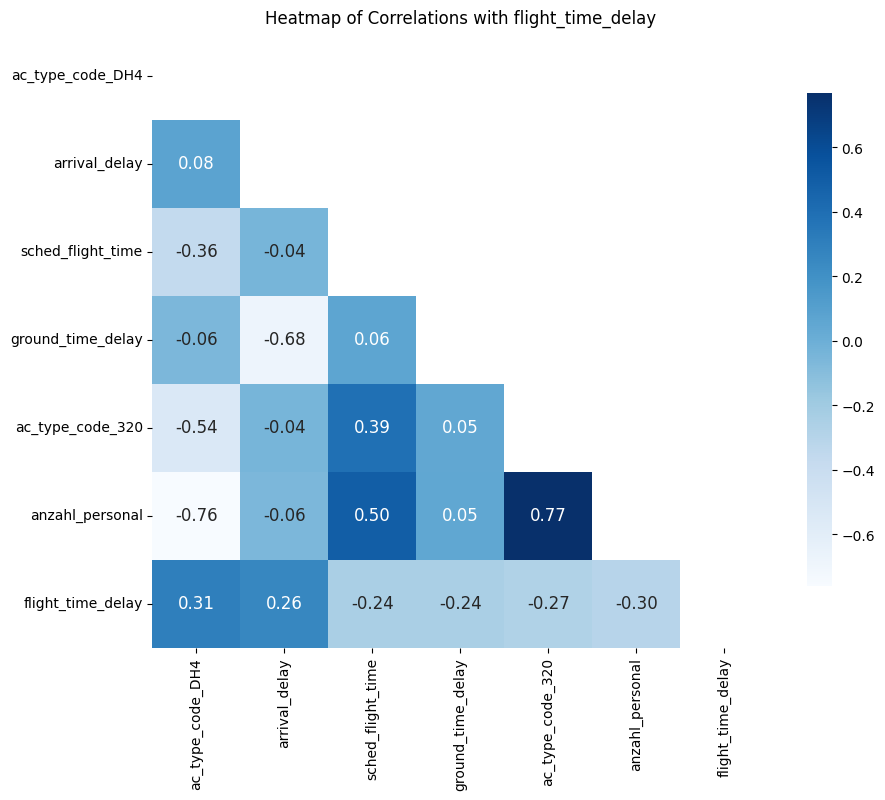

                   ac_type_code_DH4  arrival_delay  sched_flight_time  \
ac_type_code_DH4           1.000000       0.081149          -0.363336   
arrival_delay              0.081149       1.000000          -0.038746   
sched_flight_time         -0.363336      -0.038746           1.000000   
ground_time_delay         -0.060591      -0.677260           0.064980   
ac_type_code_320          -0.538467      -0.040802           0.388040   
anzahl_personal           -0.759486      -0.057132           0.498938   
flight_time_delay          0.308424       0.260774          -0.242408   

                   ground_time_delay  ac_type_code_320  anzahl_personal  \
ac_type_code_DH4           -0.060591         -0.538467        -0.759486   
arrival_delay              -0.677260         -0.040802        -0.057132   
sched_flight_time           0.064980          0.388040         0.498938   
ground_time_delay           1.000000          0.050866         0.054469   
ac_type_code_320            0.050866    

In [8]:
# Define categorical columns for One-Hot Encoding
categorical_columns = [
    'dep_ap_sched', 'arr_ap_sched', 'dep_time_of_day', 'arr_time_of_day', 
    'arr_weekday', 'dep_inbound_weekday', 'ac_type_code', 'ac_registration', 
    'change_reason_code', 'crew_group', "ac_registration"
]

# Select only the numerical columns from the DataFrame
numeric_df_flight_flightdelay = df_flight_flightdelay.select_dtypes(include=[float, int])  # Select numeric columns

# Apply One-Hot Encoding to categorical features
df_encoded = pd.get_dummies(df_flight_flightdelay[categorical_columns], drop_first=False)  # One-hot encode categorical columns

# Combine the numerical and one-hot encoded columns into a single DataFrame
df_combined = pd.concat([numeric_df_flight_flightdelay, df_encoded], axis=1)  # Combine both DataFrames

# Calculate the correlation matrix for all features in the DataFrame
correlation_matrix = df_combined.corr()  # Compute pairwise correlation
flight_time_delay_corr = correlation_matrix['flight_time_delay'].drop('flight_time_delay').sort_values(ascending=False)  # Extract correlations with 'flight_time_delay'

# Convert the correlations into a DataFrame for easier visualization
flight_time_delay_corr_df = flight_time_delay_corr.to_frame(name='Correlation')

# Display the full list of correlations
print(flight_time_delay_corr_df)

# Filter correlations to keep only those with an absolute value above 0.15
filtered_corr_df = flight_time_delay_corr_df[flight_time_delay_corr_df['Correlation'].abs() > 0.20]  # Filter by absolute correlation threshold

# Display the filtered correlations
print(filtered_corr_df)

# Calculate the correlation matrix for the relevant features (those with high correlation)
features_of_interest = filtered_corr_df.index.tolist()  # Get the features with high correlation

# Add 'flight_time_delay' to the list of features
features_of_interest.append('flight_time_delay')  # Add the target variable to the list

# Create a filtered correlation matrix that includes only the relevant features
filtered_correlation_matrix = correlation_matrix.loc[features_of_interest, features_of_interest]  # Subset the correlation matrix

# Create and display the heatmap for the filtered correlation matrix
mask = np.triu(np.ones_like(filtered_correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='Blues', mask=mask, square=True, cbar_kws={"shrink": .8})  # Plot the heatmap
plt.title('Heatmap of Correlations with flight_time_delay')
plt.show()  # Show the plot

# Save the filtered correlation matrix to a CSV file for further analysis
filtered_correlation_matrix.to_csv('filtered_correlation_matrix.csv')  # Save the matrix to CSV

# Print the filtered correlation matrix to the console
print(filtered_correlation_matrix)

Drop arrival_delay, since this information is not accessible at this point of time.
Drop ac_type_code_DH4 and ac_type_code_320 to avaoid multicollinearity with anzahl_personal

In [9]:
# Select only the important features based on filtered correlations
important_features = filtered_corr_df.index.tolist()

# List of features to be removed
features_to_remove = ['ac_type_code_DH4', 'arrival_delay', 'ac_type_code_320']

# Remove the specified features from the list
for feature in features_to_remove:
    if feature in important_features:
        important_features.remove(feature)

# Display the updated list to verify
print(important_features)

df_flight_del_prediction_data = df_combined[important_features + ['flight_time_delay']]
df_flight_del_prediction_data.head()

['sched_flight_time', 'ground_time_delay', 'anzahl_personal']


,sched_flight_time,ground_time_delay,anzahl_personal,flight_time_delay
0,230.0,33.0,6,-21.0
1,115.0,59.0,5,-13.0
2,90.0,11.0,4,3.0
3,95.0,30.0,6,-14.0
4,105.0,-14.0,4,-4.0


### Ground_time_delay

### Safe Datasets

In [10]:
# Save the filtered dataset
df_flight_del_prediction_data.to_csv("df_flight_delay_prediction_data_short.csv", index=False)